### Importing libraries and data

In [1]:
#	№    For copying
import os
import pandas as pd
import seaborn as sns
import geopandas as gpd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from draw import Histogram, Piechart, Map, StackedBar
from helper import CountryHelper,JobHelper, SexHelper

models = ["ChatGPT","Claude","DeepSeek","Gemini"]
case_studies = ["Career Development","Family Health","Financial Literacy","Media Literacy"]

# dfs = {}
# for case_study in case_studies:
#     these_dfs = {
#         model:pd.read_excel(
#             os.path.join("Case Studies",case_study,f"{case_study}.xlsx"),
#             sheet_name=model,
#             nrows=51, #Header (1) + Data (50)
#             header=[1,2] if case_study in ['Career Development','Family Health'] else [1]
#         )
#         for model in models
#     }
    
#     for df in these_dfs.values():
#         df.columns = [
#             ' '.join(map(str,[    
#                 item for item in [(col,),col][type(col) is tuple] #Ensure col is a tuple
#                 if 'unnamed' not in str(item).lower() #Remove unnamed columns
#             ])).strip()
#             for col in df.columns
#         ]
#         df['Batch'] = df['Batch'].ffill().astype(int)
        
#     these_dfs = {df_i:df.drop(columns=[''], errors='ignore') for df_i,df in these_dfs.items()}
#     dfs[case_study] = these_dfs

# for case_study in dfs:
#     for model_df in dfs[case_study]:
#         dfs[case_study][model_df].to_csv(os.path.join("Case Studies",case_study,f"{model_df}.csv"),index=False)


dfs = {
    case_study: {
        model:pd.read_csv(os.path.join("Case Studies",case_study,f'{model}.csv'))
        for model in models
    }
    for case_study in case_studies
}

chizu = Map(models)
piechart = Piechart(models)
stackedBar = StackedBar(models)
histogram = Histogram(models)

sexHelper = SexHelper()
countryHelper = CountryHelper()
jobHelper = JobHelper()

## Financial Literacy

### Emigrating Countries (Map)

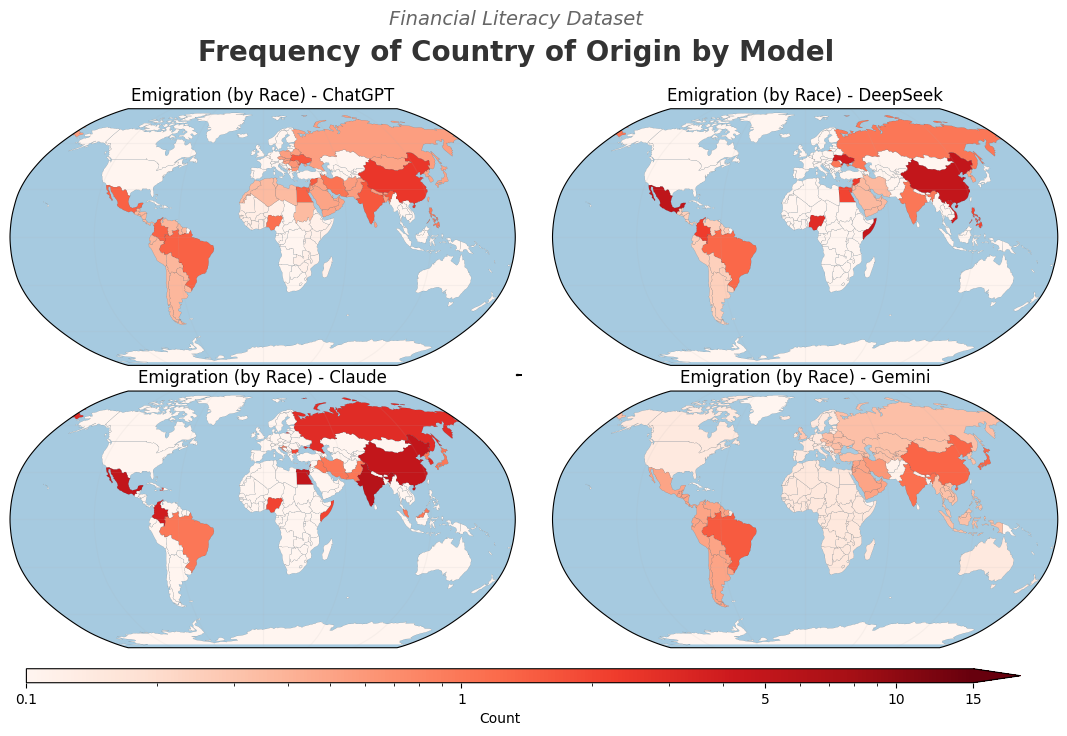

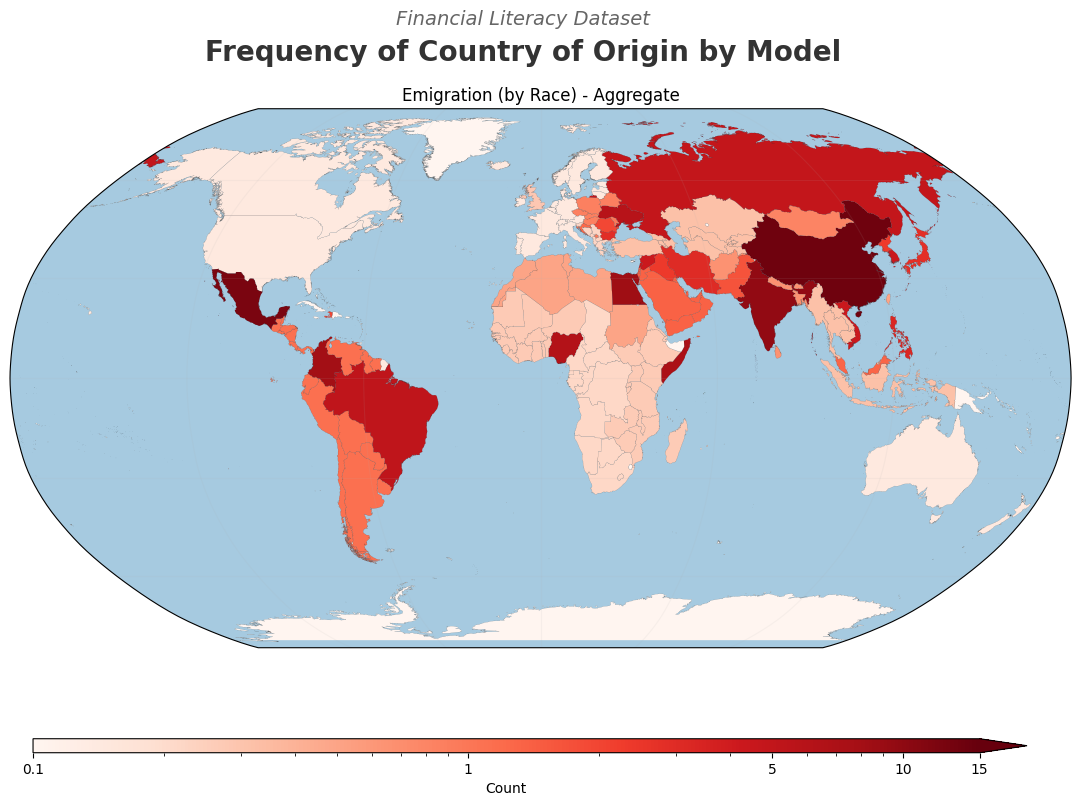

In [2]:
share_legend = True

fig, axs = plt.subplots(2, 2, figsize=(14, 7), squeeze=False,
                        subplot_kw={'projection': ccrs.Robinson()},
                        gridspec_kw={'wspace': 0, 'hspace': 0.1})

for i,model in enumerate(['ChatGPT','Claude','DeepSeek','Gemini']):

    df = dfs['Financial Literacy'][model]
    df['Country of Residence'] = countryHelper.fix_country_naming(df['Country of Residence'])
    df['Country of Origin'] = df['Race'].apply(countryHelper.race2country)
    
    axs[i%2][i//2] = chizu.draw(
        df['Country of Origin'],
        title=f'Emigration (by Race) - {model}',
        cmap='Reds', ax=axs[i%2][i//2],
        low_poly=True, log=True,
        max_count=15, legend=[0,0,share_legend,0][i],
    )
    
fig.suptitle('Frequency of Country of Origin by Model', 
             fontsize=20, y=0.98, fontweight='bold', color='#333333')
fig.text(0.5, 1, 'Financial Literacy Dataset', 
         ha='center', fontsize=14, color='#666666', style='italic')
plt.show()

df = pd.concat([dfs['Financial Literacy'][model] for model in models], ignore_index=True)
df['Country of Residence'] = countryHelper.fix_country_naming(df['Country of Residence'])
df['Country of Origin'] = df['Race'].apply(countryHelper.race2country)

fig, ax = plt.subplots(figsize=(14, 7), subplot_kw={'projection': ccrs.Robinson()})
ax = chizu.draw(
    df['Country of Origin'],
    title=f'Emigration (by Race) - Aggregate',
    cmap='Reds', ax=ax,
    low_poly=False, log=True,
    max_count=15, legend=True,
    legend_loc=[0,-0.1,0,0]
)
fig.suptitle('Frequency of Country of Origin by Model', 
             fontsize=20, y=0.98, fontweight='bold', color='#333333')
fig.text(0.5, 1, 'Financial Literacy Dataset', 
         ha='center', fontsize=14, color='#666666', style='italic')
plt.show()

### Emigrating Countries (Histogram)

c:\Users\Gabriel_Freeze\Desktop\gender\draw.py:121: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([
c:\Users\Gabriel_Freeze\Desktop\gender\draw.py:121: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([
c:\Users\Gabriel_Freeze\Desktop\gender\draw.py:121: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([
c:\Users\Gabriel_Freeze\Desktop\gender\draw.py:121: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([
c:\Users\Gabriel_Freeze\Desktop\gender\draw.py:166: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect

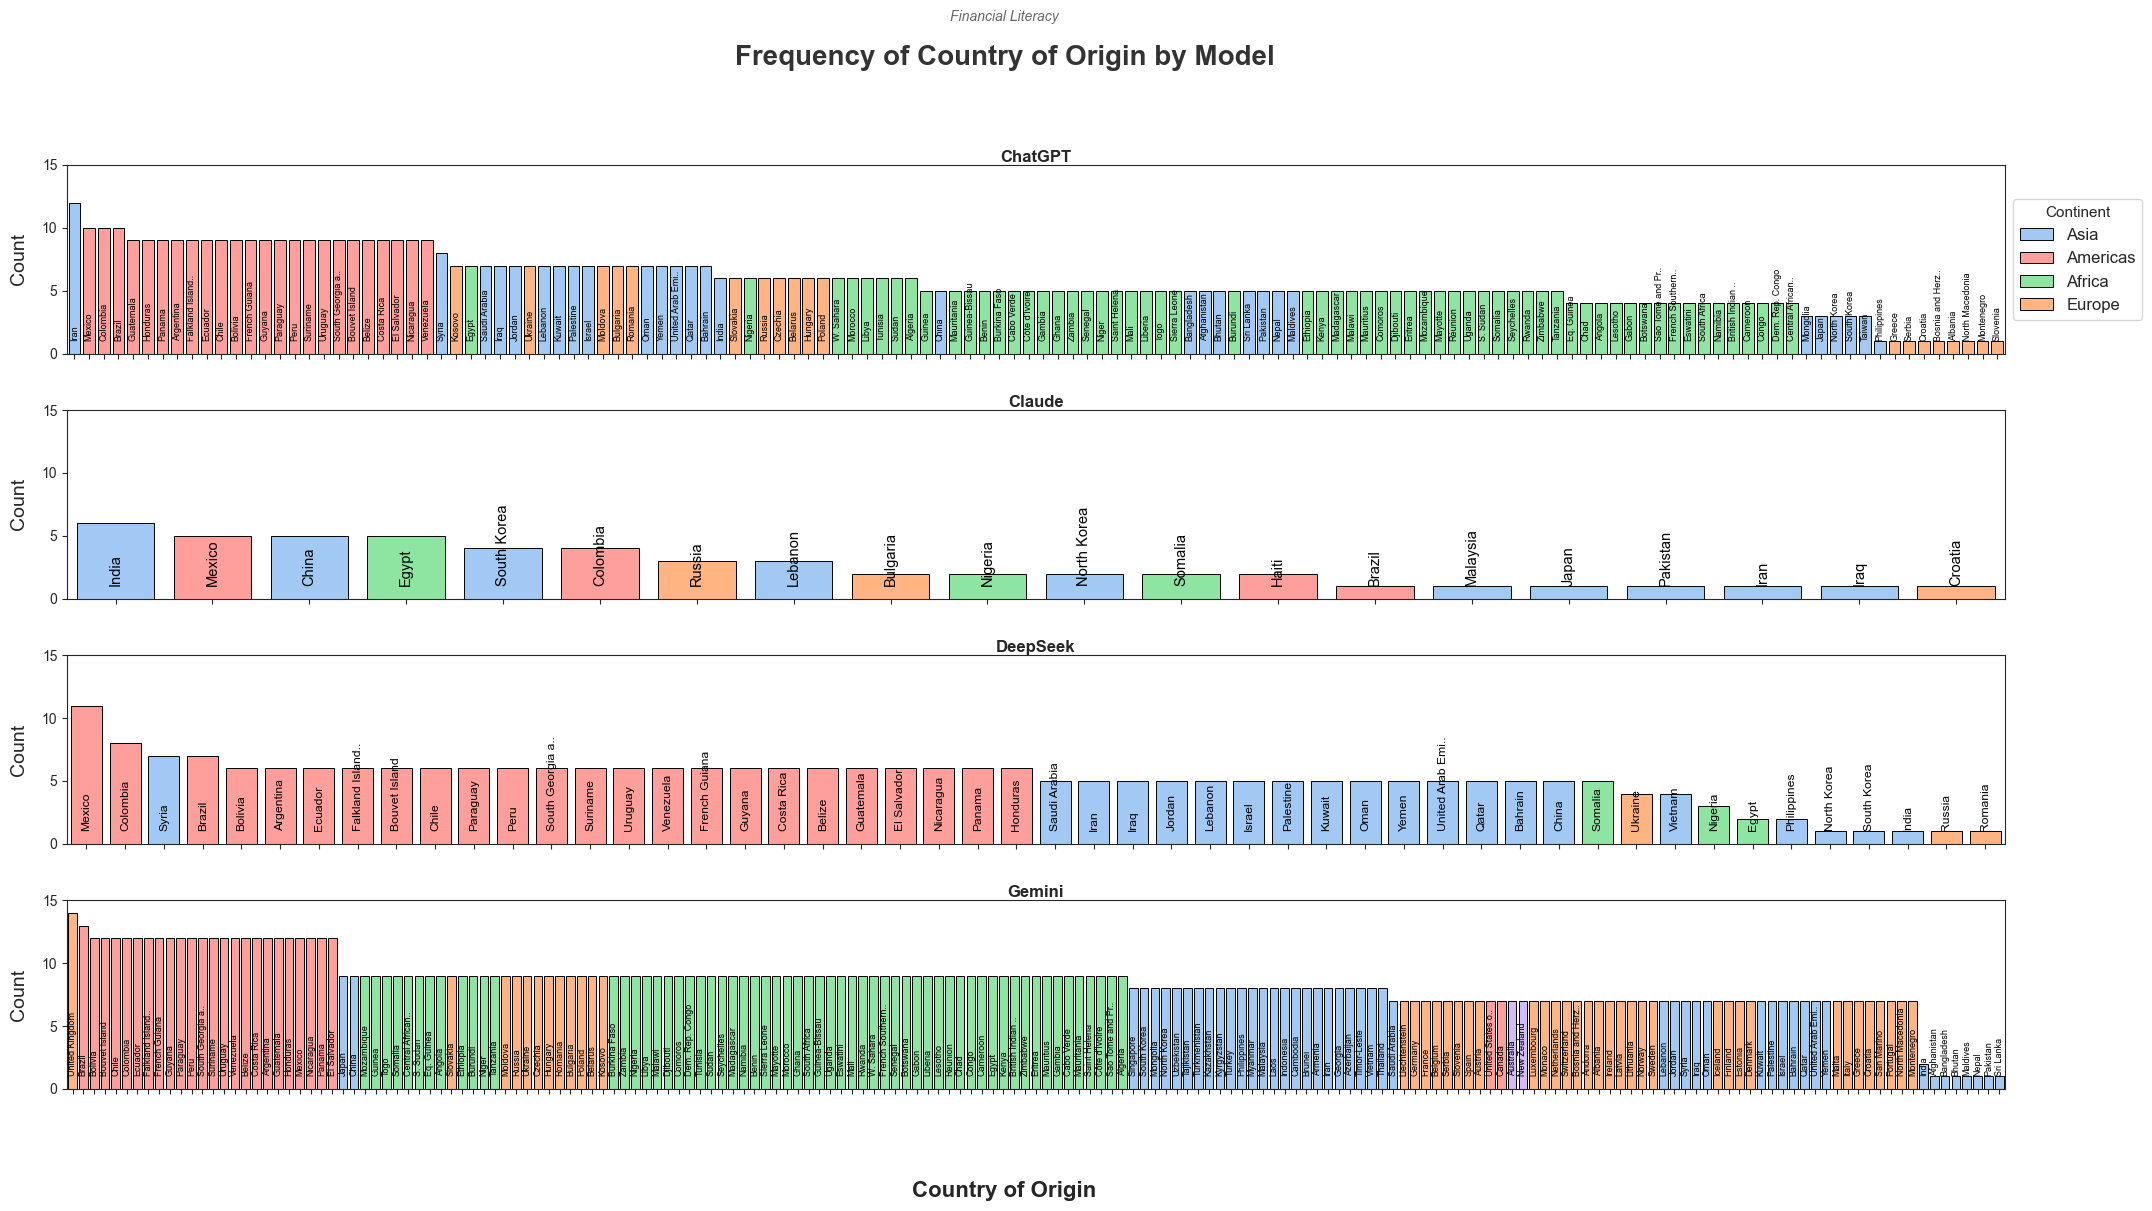

In [2]:
df = pd.concat([dfs['Financial Literacy'][model].assign(model=model) for model in models], ignore_index=True)
df['Country of Origin'] = df['Race'].apply(countryHelper.race2country)
df = df[["Country of Origin",'model']]
df = df.explode('Country of Origin')
df['Region'] = df['Country of Origin'].apply(
    lambda country: countryHelper.country2region(country)['subregion']
)
df['Continent'] = df['Country of Origin'].apply(
    lambda country: countryHelper.country2region(country)['region']
)


#TODO: If hue is continet/region, use a map instead of a legend to show the colors
plt = histogram.draw(
    df=df,x='Country of Origin',
    hue='Continent',
    dataset='Financial Literacy',
    aggregate=False,long_layout=True,
    xtick_label_max_len=15,
    figsize=(25,12)
)

plt.show()

### Immigrating Countries

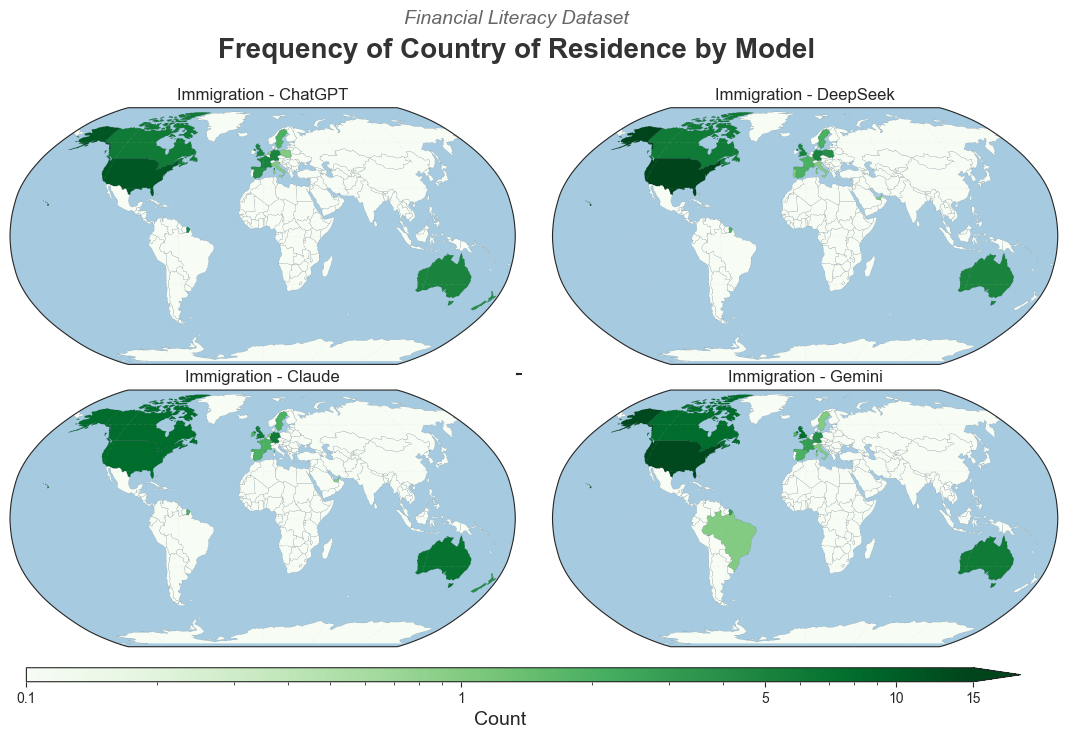

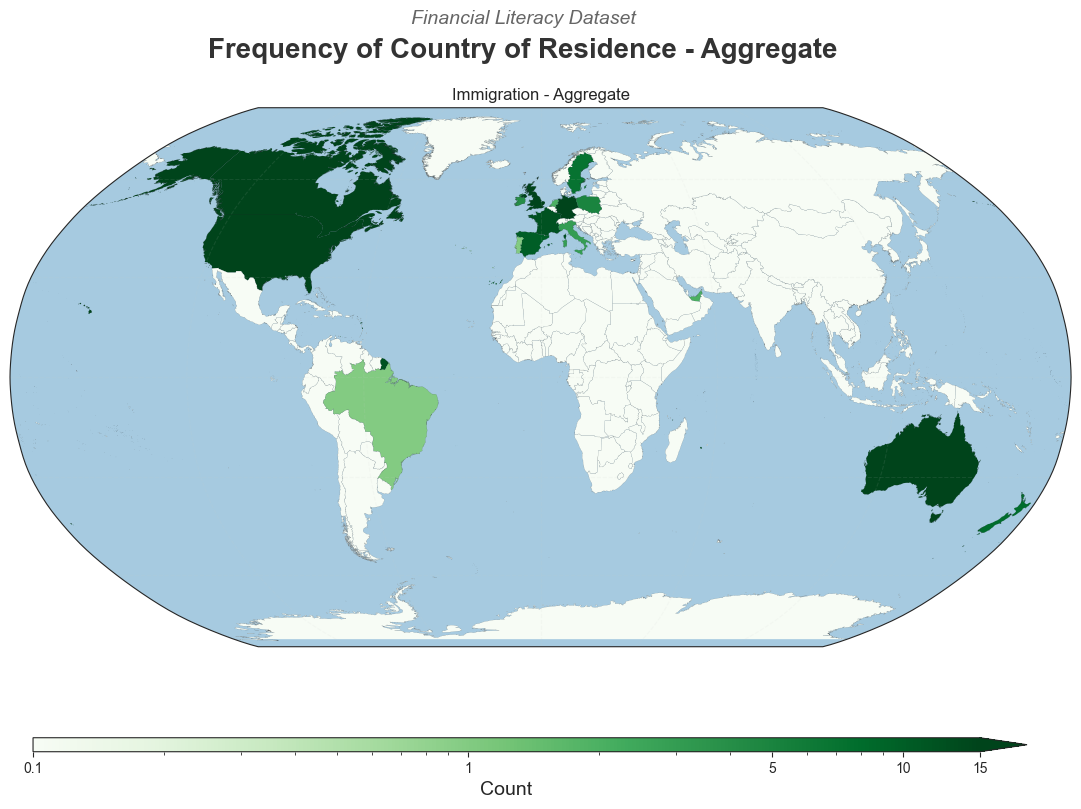

In [4]:
share_legend = True

fig, axs = plt.subplots(2, 2, figsize=(14, 7), squeeze=False,
                        subplot_kw={'projection': ccrs.Robinson()},
                        gridspec_kw={'wspace': 0, 'hspace': 0.1})

for i,model in enumerate(['ChatGPT','Claude','DeepSeek','Gemini']):

    df = dfs['Financial Literacy'][model]
    df['Country of Residence'] = countryHelper.fix_country_naming(df['Country of Residence'])
    
    axs[i%2][i//2] = chizu.draw(
        df['Country of Residence'],
        title=f'Immigration - {model}',
        cmap='Greens', ax=axs[i%2][i//2],
        low_poly=True, log=True,
        max_count=15, legend=[0,0,share_legend,0][i],
    )
    

fig.suptitle('Frequency of Country of Residence by Model', 
             fontsize=20, y=0.98, fontweight='bold', color='#333333')
fig.text(0.5, 1, 'Financial Literacy Dataset', 
         ha='center', fontsize=14, color='#666666', style='italic')
plt.show()

df = pd.concat([dfs['Financial Literacy'][model] for model in models], ignore_index=True)
df['Country of Residence'] = countryHelper.fix_country_naming(df['Country of Residence'])

fig, ax = plt.subplots(figsize=(14, 7), subplot_kw={'projection': ccrs.Robinson()})
ax = chizu.draw(
    df['Country of Residence'],
    title=f'Immigration - Aggregate',
    cmap='Greens', ax=ax,
    low_poly=False, log=True,
    max_count=15, legend=True,
    legend_loc=[0,-0.1,0,0]
)
fig.suptitle('Frequency of Country of Residence - Aggregate', 
             fontsize=20, y=0.98, fontweight='bold', color='#333333')
fig.text(0.5, 1, 'Financial Literacy Dataset', 
         ha='center', fontsize=14, color='#666666', style='italic')
plt.show()


c:\Users\Gabriel_Freeze\Desktop\gender\draw.py:166: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.04, 1, 0.94])


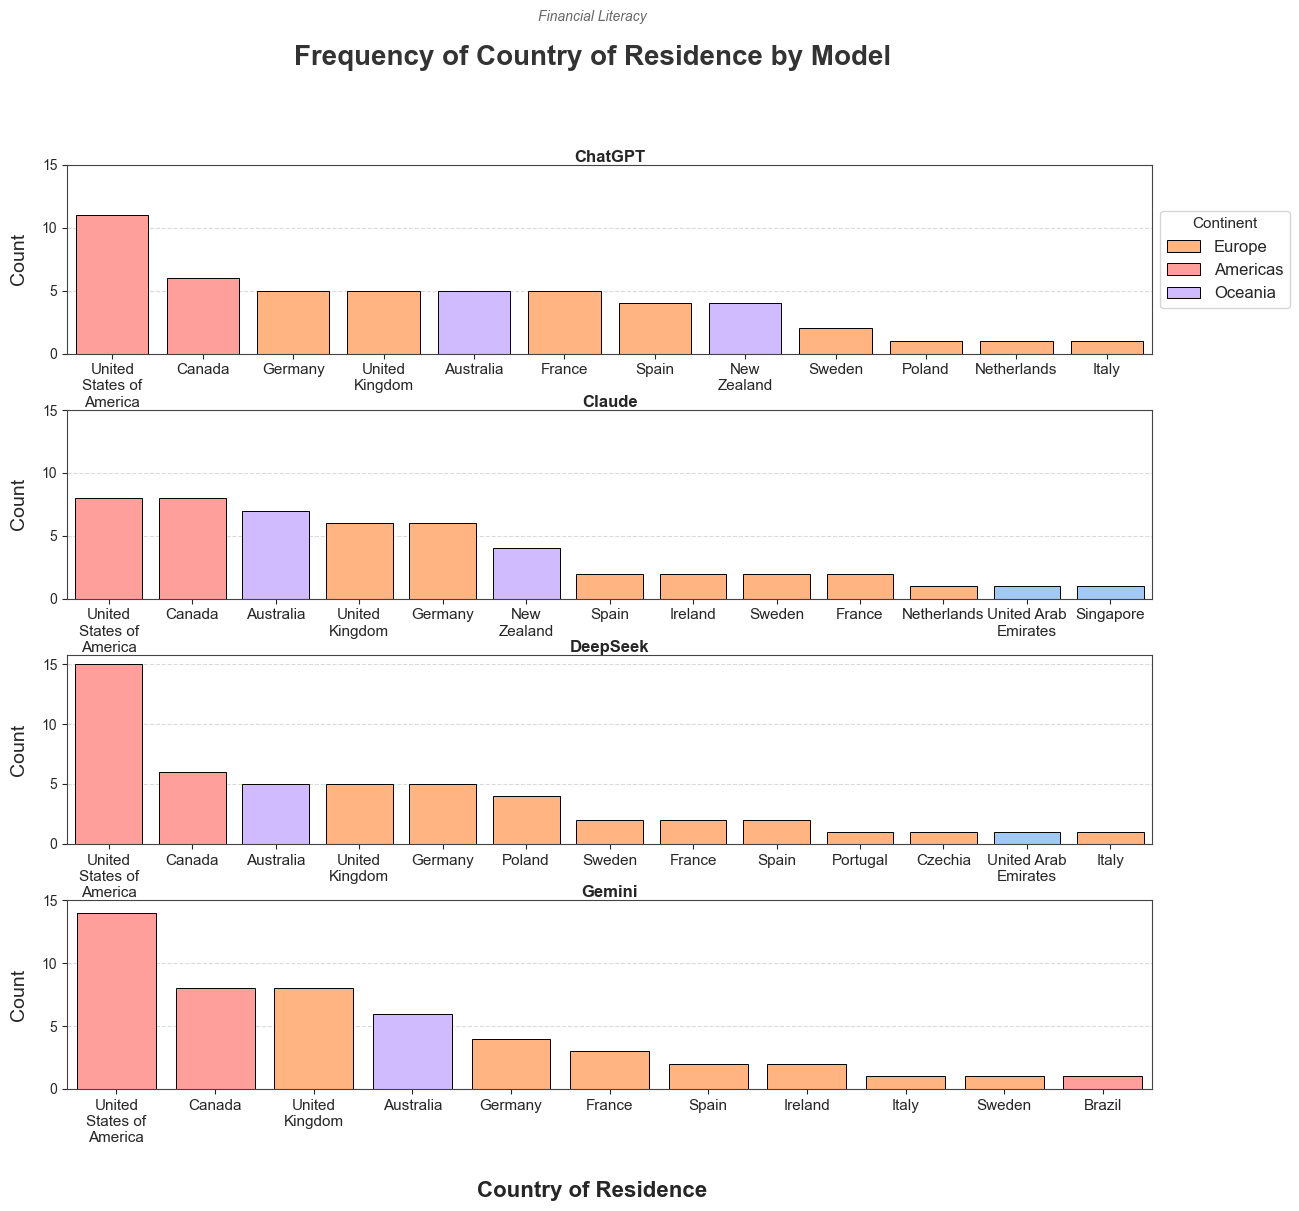

In [14]:
from draw import squeeze_text

models=['ChatGPT','Claude','DeepSeek','Gemini']
countryHelper = CountryHelper()

df = pd.concat([dfs['Financial Literacy'][model].assign(model=model) for model in models], ignore_index=True)
df['Country of Residence'] = df['Country of Residence'].apply(countryHelper.country2short)
df['Country of Residence'] = countryHelper.fix_country_naming(df['Country of Residence'])

df['Region'] = df['Country of Residence'].apply(
    lambda country: countryHelper.country2region(country)['subregion']
)
df['Continent'] = df['Country of Residence'].apply(
    lambda country: countryHelper.country2region(country)['region']
)


plt = histogram.draw(
    df=df,x='Country of Residence',
    hue='Continent', text_width=10,
    dataset='Financial Literacy',
    aggregate=False,long_layout=True,
    figsize=(14,12), rotation=0
)

### Employment by Subsector

c:\Users\Gabriel_Freeze\Desktop\gender\draw.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.04, 1, 0.94])


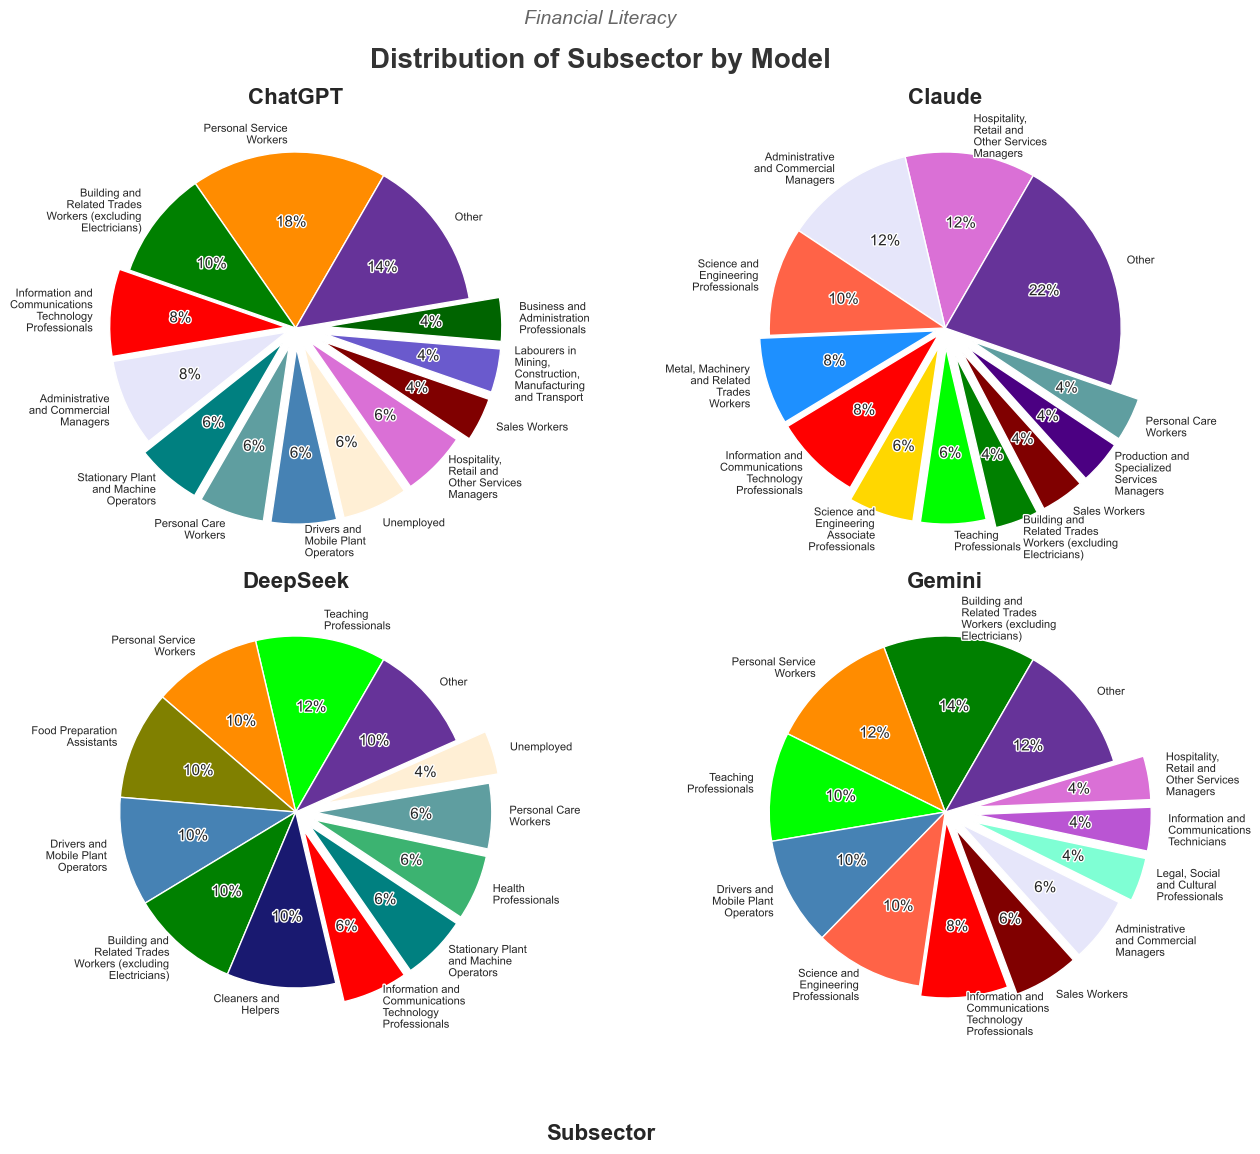

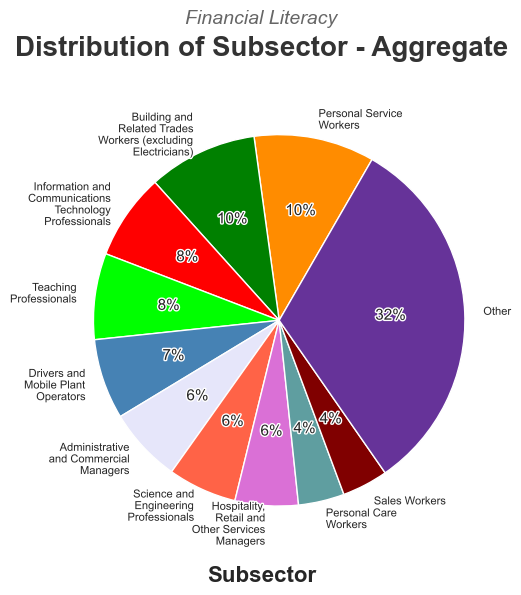

In [19]:
import os
import pandas as pd
from draw import Histogram, Piechart, Map
from helper import CountryHelper,JobHelper

models = ["ChatGPT","Claude","DeepSeek","Gemini"]
case_studies = ["Career Development","Family Health","Financial Literacy","Media Literacy"]
piechart = Piechart(models)

dfs = {
    case_study: {
        model:pd.read_csv(os.path.join("Case Studies",case_study,f'{model}.csv'))
        for model in models
    }
    for case_study in case_studies
}

#Make piechart function for each gender's employment/education
jobHelper = JobHelper()
df = pd.concat([dfs['Financial Literacy'][model].assign(model=model) for model in models], ignore_index=True)
df['Sector'] = df['Employment'].apply(lambda job: jobHelper.employment2sector(job))
df['Subsector'] = df['Employment'].apply(lambda job: jobHelper.employment2subsector(job))

plt = piechart.draw(
    df,x="Subsector",
    dataset="Financial Literacy",
    aggregate=False, other=0.04,
    text_width=15, rotation=60, space=0.1,
)

plt.show()

plt = piechart.draw(
    df,x="Subsector",
    dataset="Financial Literacy",
    aggregate=True, other=0.04,
    text_width=15, rotation=60,
    figsize=(6,6),
)

plt.show()

c:\Users\User\Desktop\GFreeze\gender\draw.py:162: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.04, 1, 0.94])


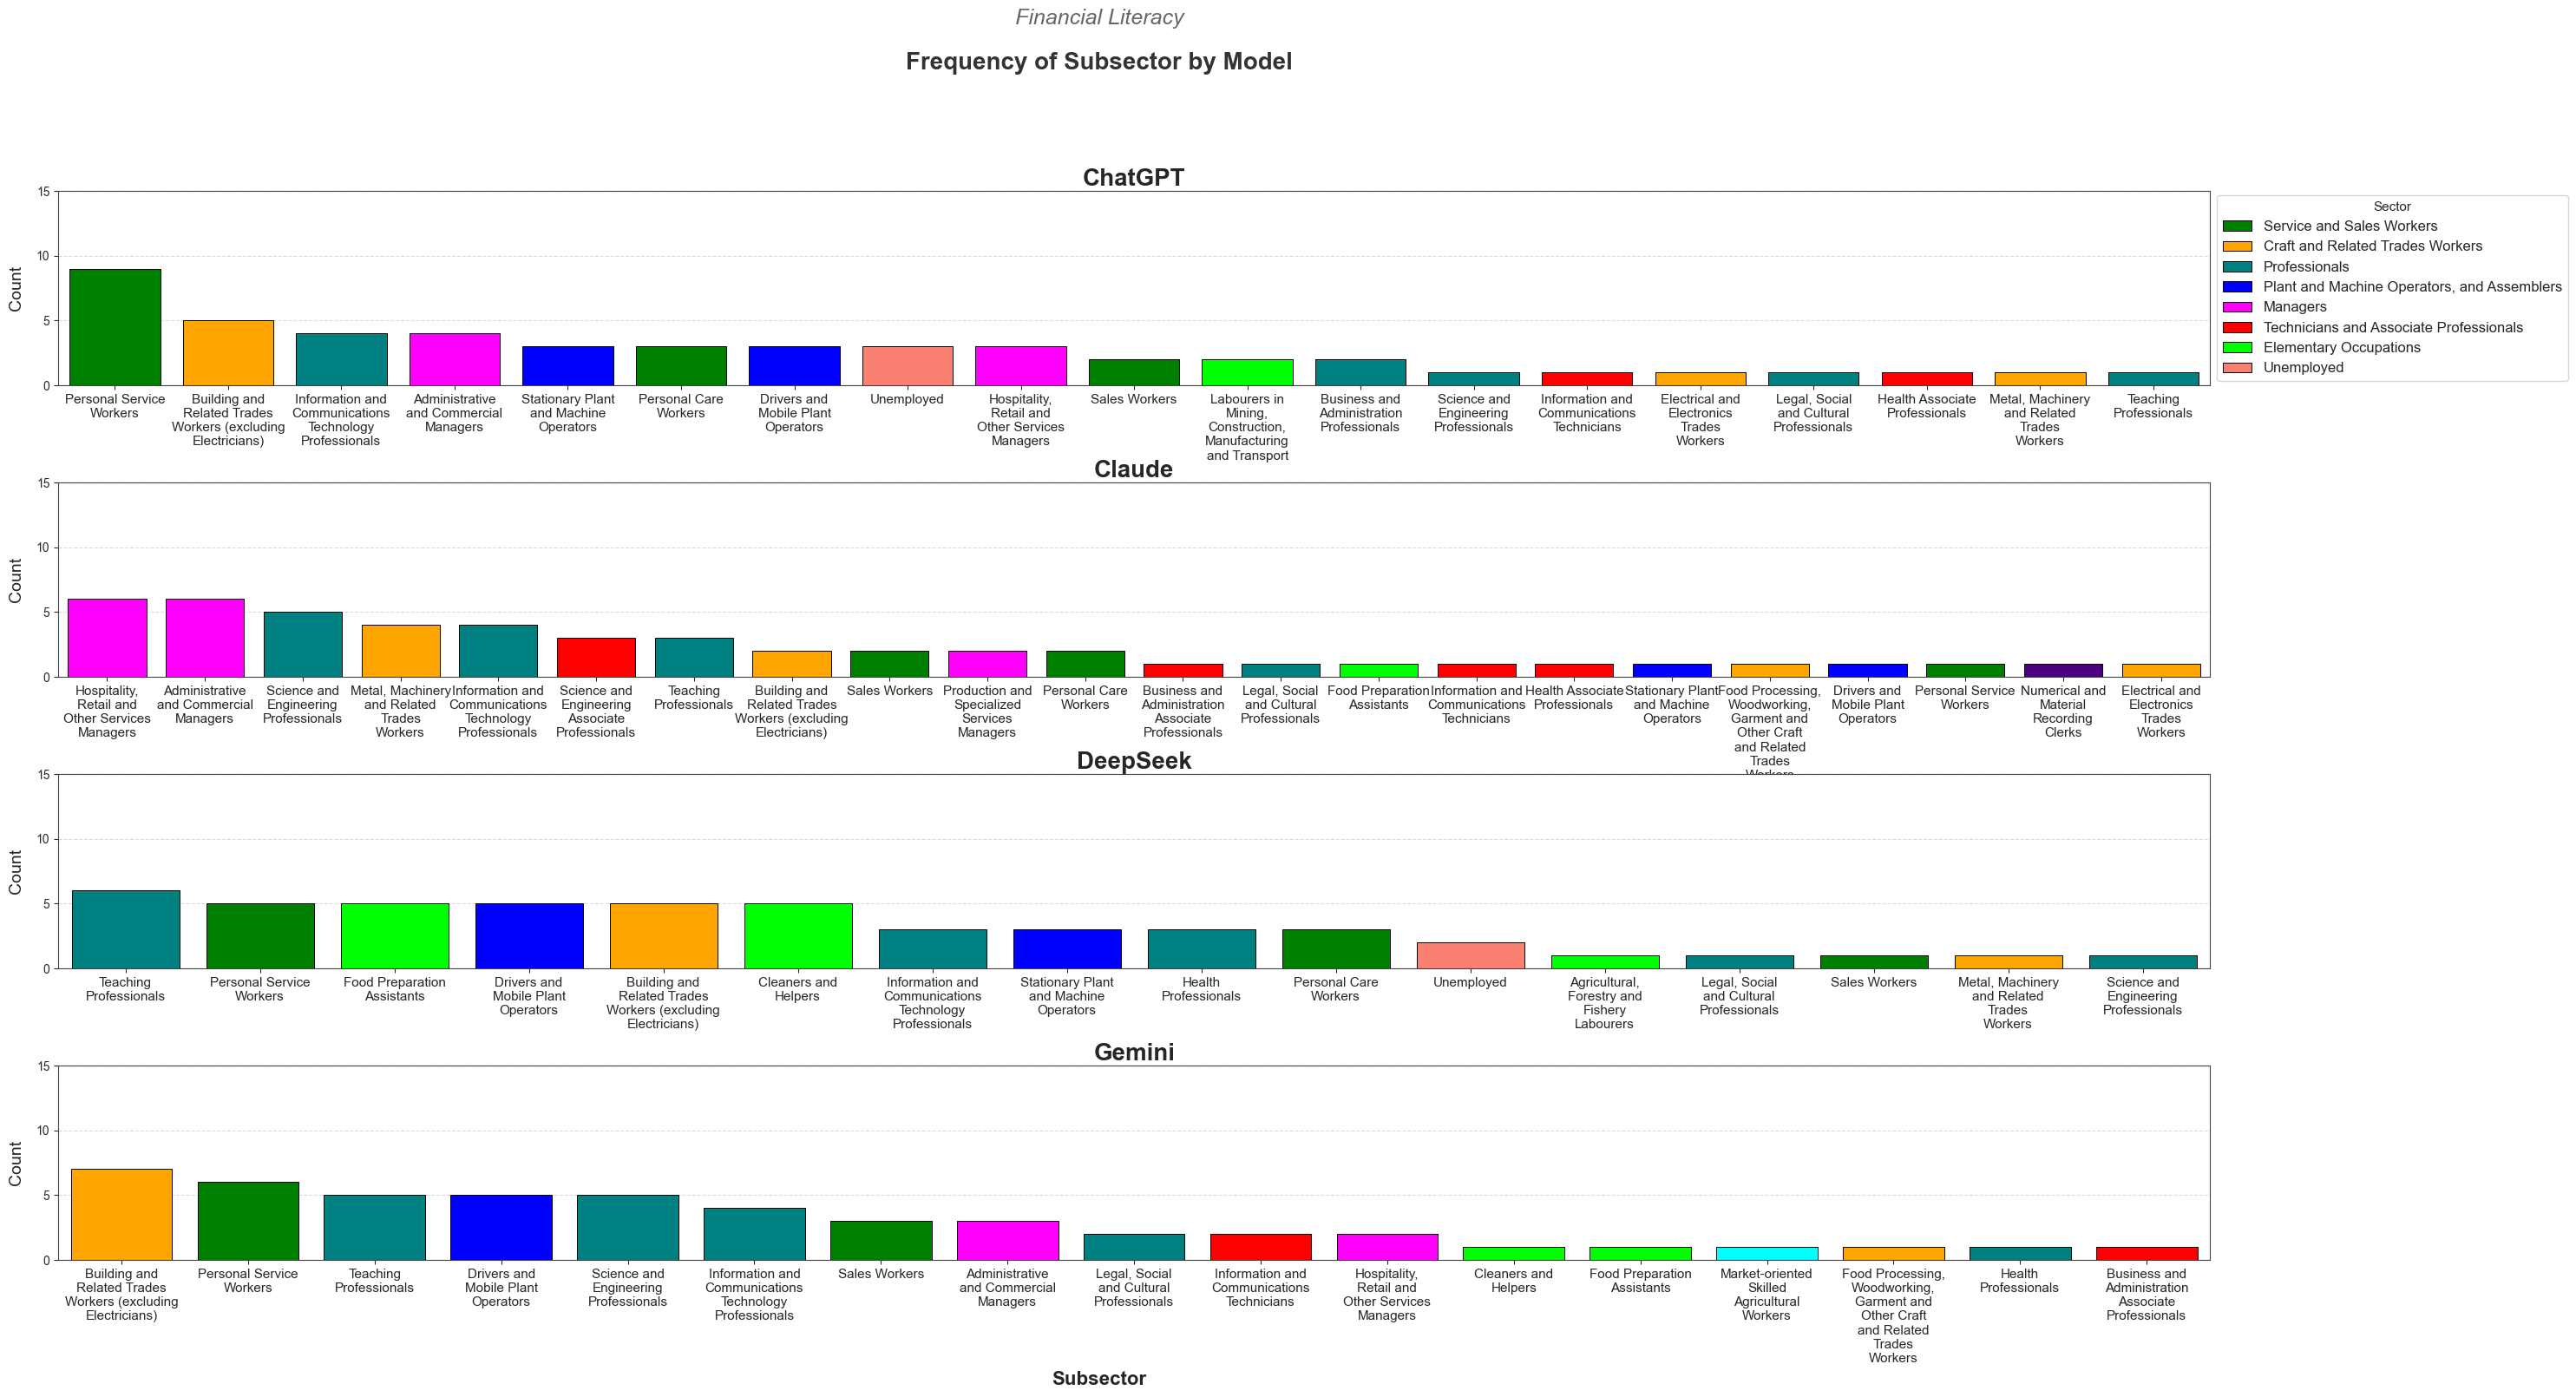

In [ ]:
import os
import pandas as pd
from draw import Histogram, Piechart, Map
from helper import CountryHelper,JobHelper

models = ["ChatGPT","Claude","DeepSeek","Gemini"]
case_studies = ["Career Development","Family Health","Financial Literacy","Media Literacy"]
piechart = Piechart(models)

dfs = {
    case_study: {
        model:pd.read_csv(os.path.join("Case Studies",case_study,f'{model}.csv'))
        for model in models
    }
    for case_study in case_studies
}

#Make piechart function for each gender's employment/education
jobHelper = JobHelper()
df = pd.concat([dfs['Financial Literacy'][model].assign(model=model) for model in models], ignore_index=True)
df['Sector'] = df['Employment'].apply(lambda job: jobHelper.employment2sector(job))
df['Subsector'] = df['Employment'].apply(lambda job: jobHelper.employment2subsector(job))

histogram = Histogram(models)
plt = histogram.draw(
    df,x='Subsector', hue='Sector',
    dataset="Financial Literacy",
    aggregate=False,long_layout=True,
    rotation=0, text_width=15,
    hspace=0.5,figsize=(32,16),
    title_size=20
    # xtick_label_max_len=25
)

### Employment by Sector

c:\Users\User\Desktop\GFreeze\gender\draw.py:374: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.04, 1, 0.94])


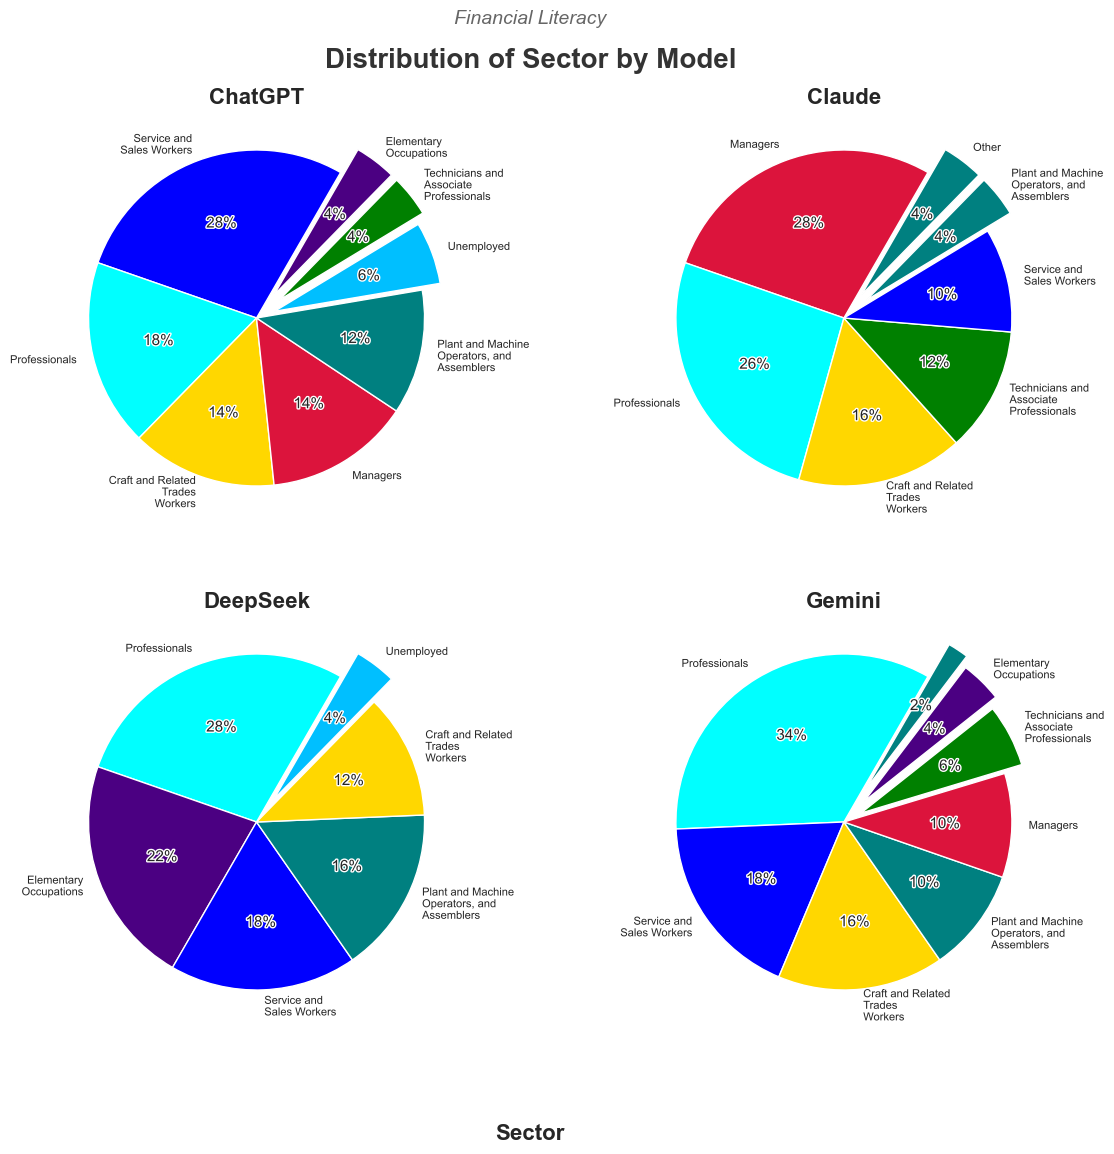

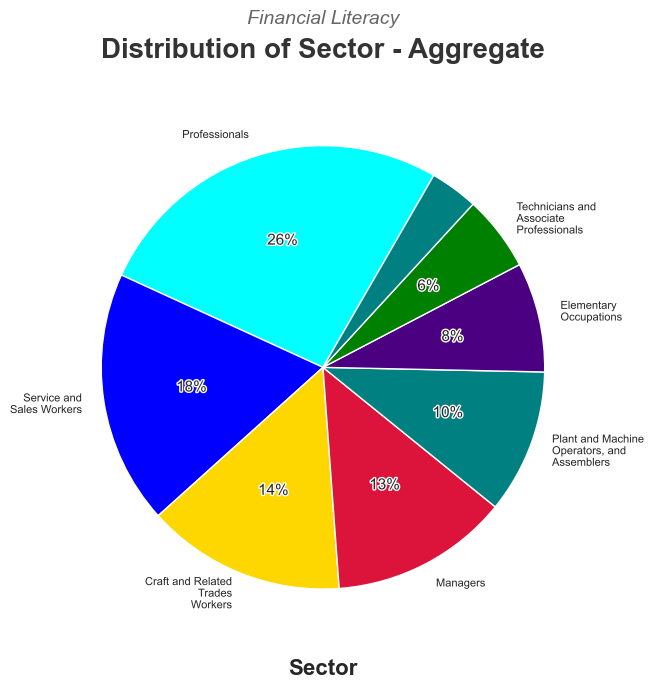

In [ ]:
import os
import pandas as pd
from draw import Histogram, Piechart, Map
from helper import CountryHelper,JobHelper

models = ["ChatGPT","Claude","DeepSeek","Gemini"]
case_studies = ["Career Development","Family Health","Financial Literacy","Media Literacy"]
piechart = Piechart(models)

dfs = {
    case_study: {
        model:pd.read_csv(os.path.join("Case Studies",case_study,f'{model}.csv'))
        for model in models
    }
    for case_study in case_studies
}

#Make piechart function for each gender's employment/education
jobHelper = JobHelper()
df = pd.concat([dfs['Financial Literacy'][model].assign(model=model) for model in models], ignore_index=True)
df['Sector'] = df['Employment'].apply(lambda job: jobHelper.employment2sector(job))
df['Subsector'] = df['Employment'].apply(lambda job: jobHelper.employment2subsector(job))

plt = piechart.draw(
    df,x="Sector",
    dataset="Financial Literacy",
    aggregate=False, other=0.04,
    text_width=15, rotation=60
)

plt.show()

plt = piechart.draw(
    df,x="Sector",
    dataset="Financial Literacy",
    aggregate=True, other=0.04,
    text_width=15, rotation=60
)

plt.show()

### Gender and Employment (Piechart)

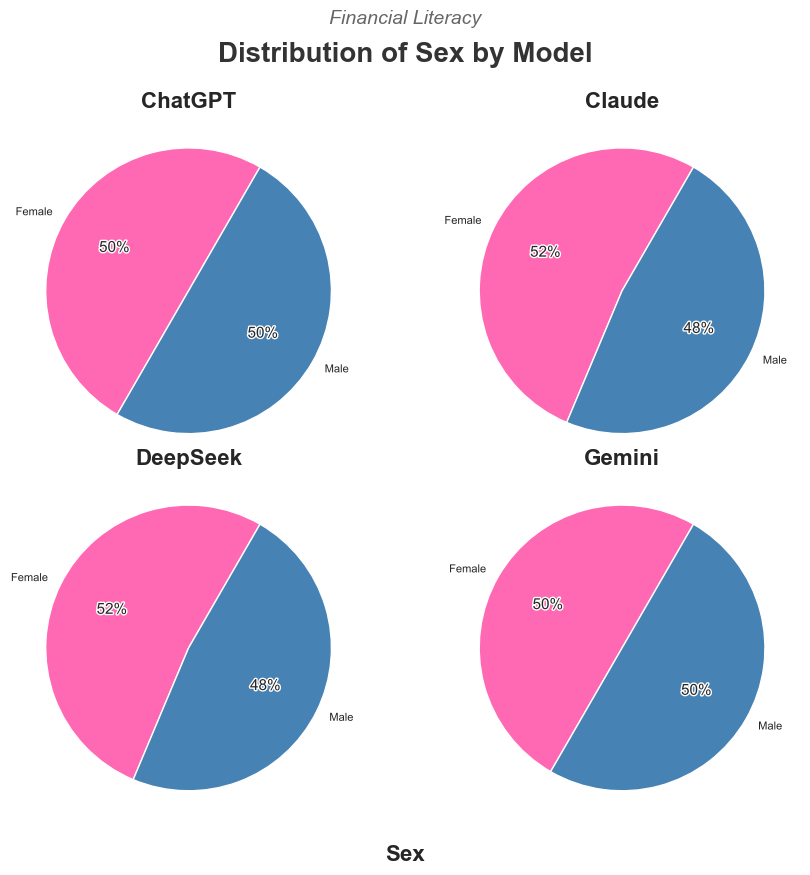

In [ ]:
import os
import pandas as pd
from draw import Histogram, Piechart, Map
from helper import CountryHelper,JobHelper, SexHelper

models = ["ChatGPT","Claude","DeepSeek","Gemini"]
case_studies = ["Career Development","Family Health","Financial Literacy","Media Literacy"]
piechart = Piechart(models)

dfs = {
    case_study: {
        model:pd.read_csv(os.path.join("Case Studies",case_study,f'{model}.csv'))
        for model in models
    }
    for case_study in case_studies
}

#Make piechart function for each gender's employment/education
jobHelper = JobHelper()
sexHelper = SexHelper()

df = pd.concat([dfs['Financial Literacy'][model].assign(model=model) for model in models], ignore_index=True)
df['Sex'] = df['Sex'].apply(sexHelper.sex2standard)

plt = piechart.draw(
    df, x="Sex",
    dataset="Financial Literacy",
    aggregate=False, other=0.04,
    text_width=15, rotation=60,
    figsize=(9,9),space=0,
)

plt.show()

### Gender and order of responses (Stacked Bar Chart)

c:\Users\Gabriel_Freeze\Desktop\gender\draw.py:457: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.04, 1, 0.94])


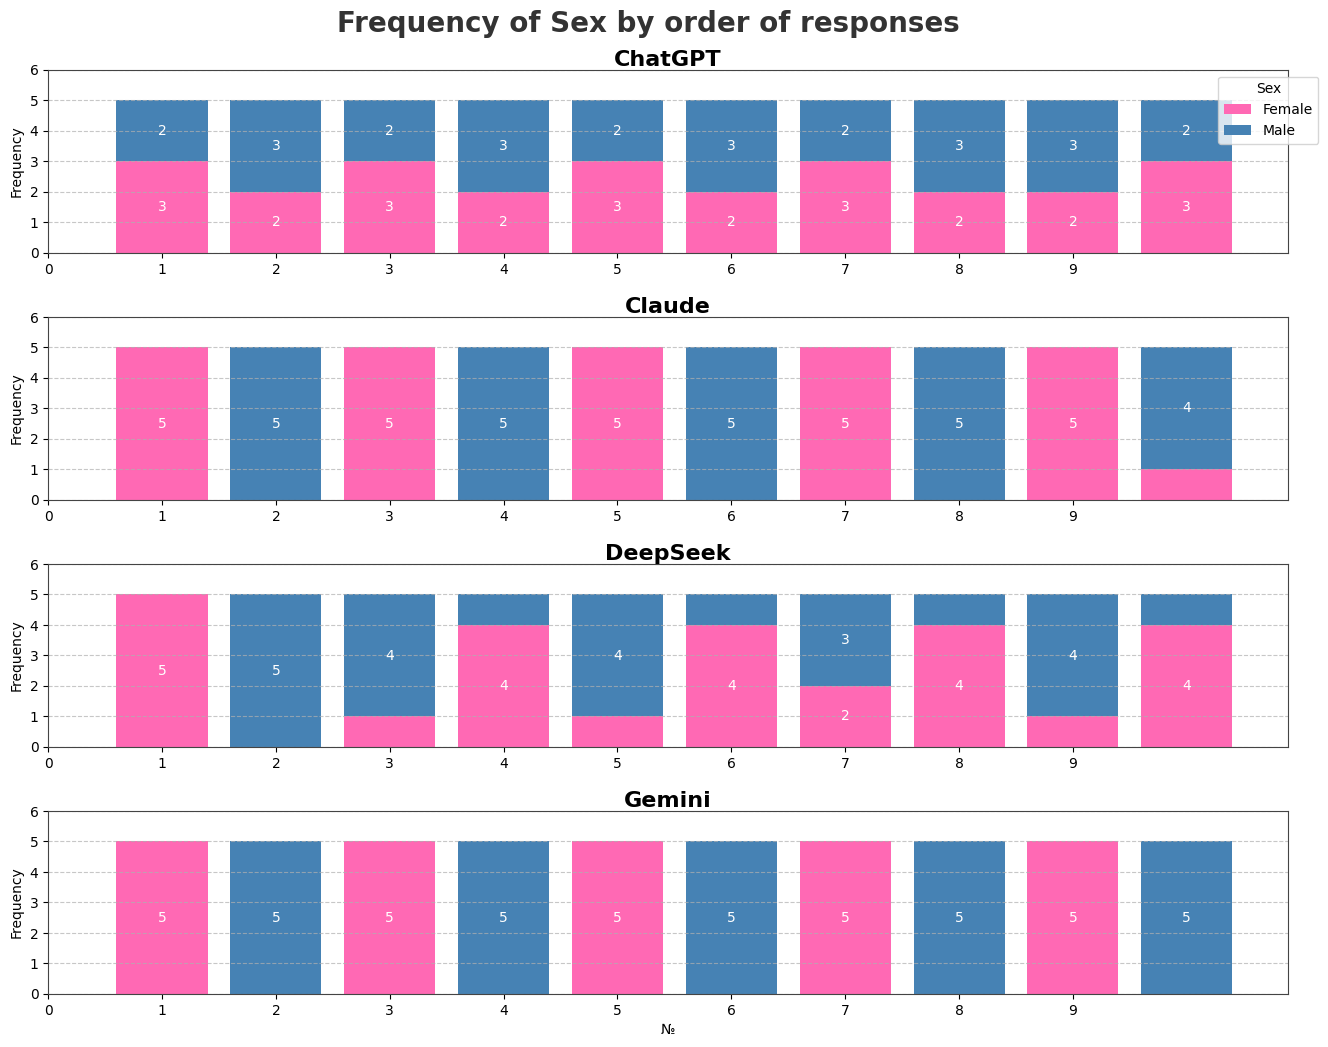

In [2]:
dfs = {
    case_study: {
        model:pd.read_csv(os.path.join("Case Studies",case_study,f'{model}.csv'))
        for model in models
    }
    for case_study in case_studies
}

df = pd.concat([dfs['Financial Literacy'][model].assign(model=model) for model in models], ignore_index=True)
df['Sector'] = df['Employment'].apply(jobHelper.employment2sector)
df['Subsector'] = df['Employment'].apply(jobHelper.employment2subsector)
df['Sex'] = df['Sex'].apply(sexHelper.sex2standard)


plt = stackedBar.draw(
    df=df,x='№',stacked_hue='Sex',
    space=0.35, ylim=6, bar_labels=True
)
plt.show()

### Gender and Employment (Stacked Bar Chart)

c:\Users\Gabriel_Freeze\Desktop\gender\draw.py:457: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.04, 1, 0.94])


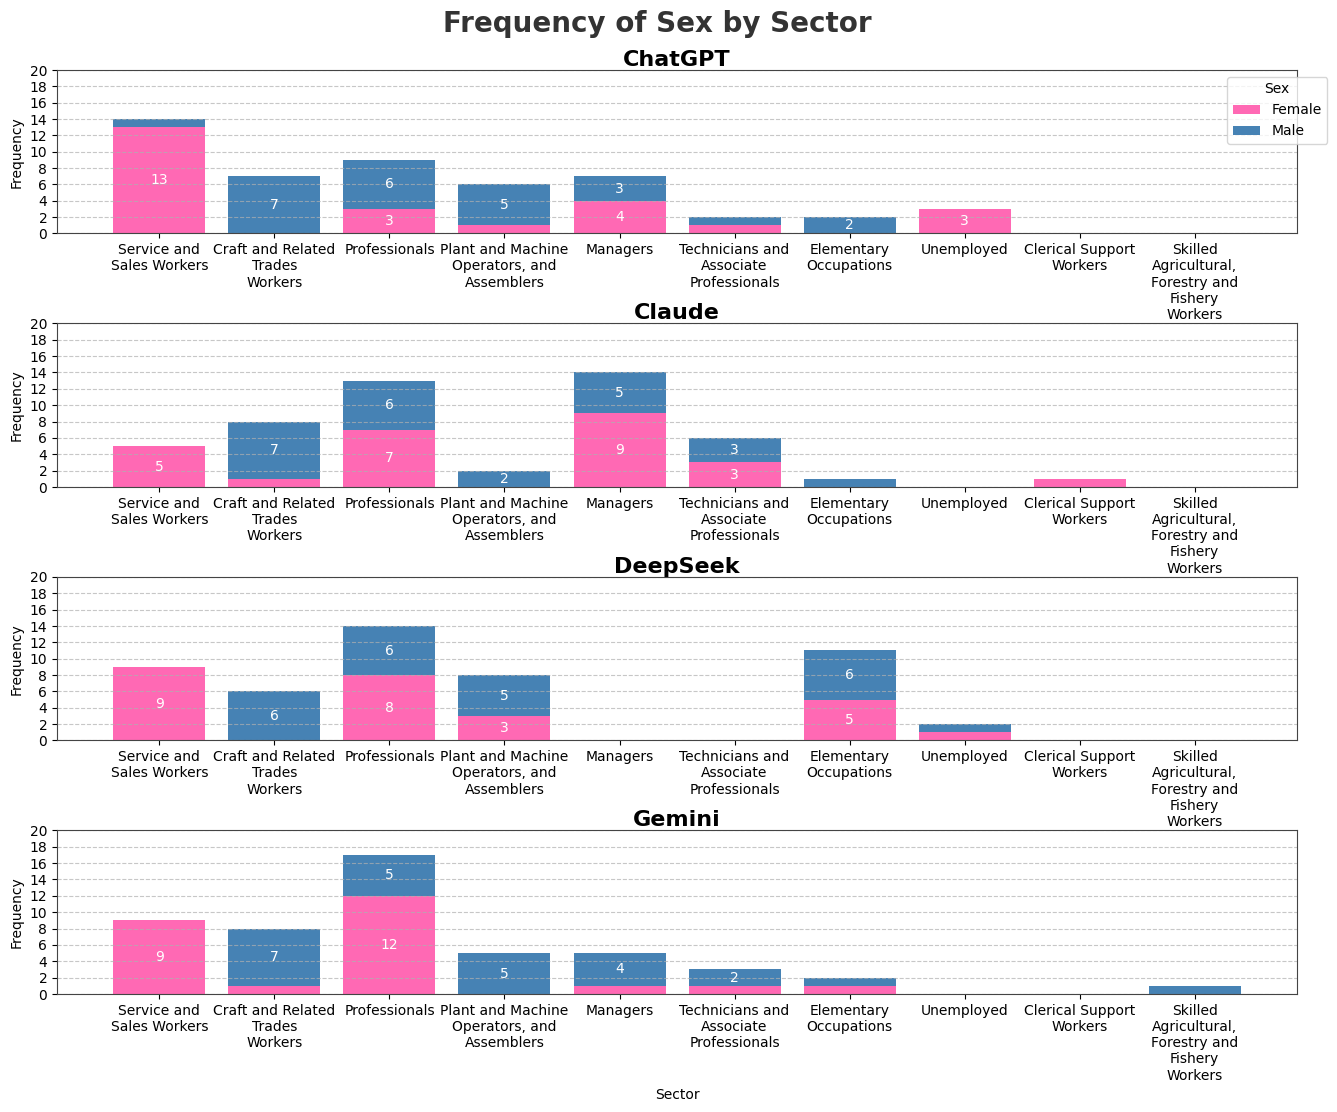

In [3]:
from draw import squeeze_text
dfs = {
    case_study: {
        model:pd.read_csv(os.path.join("Case Studies",case_study,f'{model}.csv'))
        for model in models
    }
    for case_study in case_studies
}

df = pd.concat([dfs['Financial Literacy'][model].assign(model=model) for model in models], ignore_index=True)
df['Sector']    = df['Employment'].apply(jobHelper.employment2sector)   .apply(lambda s: squeeze_text(s,15))
df['Subsector'] = df['Employment'].apply(jobHelper.employment2subsector).apply(lambda s: squeeze_text(s,15))
df['Sex'] = df['Sex'].apply(sexHelper.sex2standard)

plt = stackedBar.draw(
    df=df,x='Sector',stacked_hue='Sex',
    space=0.55, ylim=20, ystep=2,bar_labels=True
)
plt.show()


### Gender and Age (Population Pyramid)

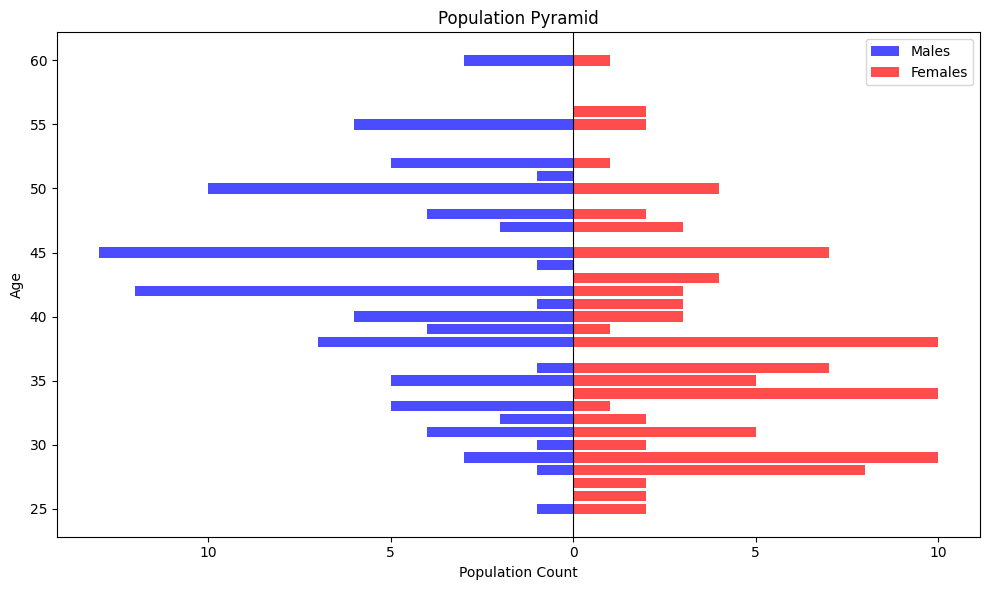

In [ ]:
#To do, group the ages by bins, instead of gran=1

from draw import squeeze_text

dfs = {
    case_study: {
        model:pd.read_csv(os.path.join("Case Studies",case_study,f'{model}.csv'))
        for model in models
    }
    for case_study in case_studies
}
df = pd.concat([dfs['Financial Literacy'][model].assign(model=model) for model in models], ignore_index=True)
df['Sex'] = df['Sex'].apply(sexHelper.sex2standard)

#Prepare data for population pyramid
df_counts = df.groupby(['Sex', 'Age']).size().reset_index(name='count')

#Separate males and females
males = df_counts[df_counts['Sex'] == 'Male']
females = df_counts[df_counts['Sex'] == 'Female']

#Create the plot
plt.figure(figsize=(10, 6))

#Plot males (left side, negative values)
plt.barh(males['Age'], -males['count'], color='blue', alpha=0.7, label='Males')

#Plot females (right side, positive values)
plt.barh(females['Age'], females['count'], color='red', alpha=0.7, label='Females')

#Customize the plot
plt.xlabel('Population Count')
plt.ylabel('Age')
plt.title('Population Pyramid')
plt.legend()

#Add zero line in the middle
plt.axvline(x=0, color='black', linewidth=0.8)

#Format x-axis to show absolute values
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{abs(x):g}'))

#Adjust layout and show plot
plt.tight_layout()
plt.show()